# Project	2: Centrality,	degree-degree correlation and	community	structure	in	networks

Giovanna Zolin Pinheiro Hayasida - n: 9762848 

Luna Wagner Cunha - n: 9762831

1 - feito / ver Comunicability accessibility function / Discuss	the	highest	correlations	and	interpret	the	results.(??)
Pra essa função acho que a Mari postou algo no fórum pra pegar outra função, vou ver lá quando der.

2 - feito 

3 - feito /Consegui as bases, só falta copiar e colar as coisas do a e do b no c, d e e.

4 - faltam as bases (eu sei o que fazer, mas vai dar um trampinho vejo amanhã)

5 - feito 

6 - feito

7 - incompleto (Meu colega falou que o Net.. tá com executável quebrado e que o info é complicado de rodar, ele fez mas deu mótrampo não sei se compensa o crime)

8 - O link é o mesmo do 6 não tinha visto isso. Só rodar o 7 variando o mu. E calculando o coeficiente que ele quer

9 - null

10 - Ideias ?? 

In [8]:
#Pacotes 
import networkx as nx 
import matplotlib.pyplot as plt
from numpy  import *
import numpy as np
import pandas as pd

from scipy.linalg import expm
from scipy.sparse import csr_matrix, issparse
from scipy import stats
import collections
from scipy.stats import moment

# Exercício 1 

In [2]:
def calcula_medidas(G):
    #I) Degree
    vk = dict(G.degree())
    vk = list(vk.values())
    #II) K-core
    KC= dict(nx.core_number(G))
    KC = list(KC.values())
    #III) Closeness centrality
    CLC = dict(nx.closeness_centrality(G))
    CLC = list(CLC.values())
    #IV) Betweenness centrality
    B = dict(nx.betweenness_centrality(G))
    B = list(B.values())

    #V) Eigenvector centrality
    EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
    EC = list(EC.values())

    #VI) Page rank
    PR = dict(nx.pagerank(G, alpha=0.85))
    PR = list(PR.values())
    
    #VII) Random walk accessibility
    def acc(G):
        N = len(G.nodes())
        vk = dict(G.degree())
        vk = list(vk.values())
        A = nx.adjacency_matrix(G)
        P = np.zeros((N,N), dtype = 'float')
        for i in np.arange(0, N):
            for j in np.arange(i, N):
                P[i,j] = A[i,j]/vk[i]
                P[j,i] = P[i,j]
        P2 = expm(P)/np.exp(1)
        vacc = np.zeros(N, dtype = float)
        for i in np.arange(0, N):
            acc = 0
            for j in np.arange(0,N):
                if(P2[i,j] > 0):
                    acc = acc + P2[i,j]*log(P2[i,j])
            acc = np.exp(-acc)
            vacc[i] = acc
        return vacc
    vacc = acc(G)

    return vk, KC, CLC, B, EC, PR, vacc



## A

In [3]:
G = nx.read_edgelist("euroroad.txt", nodetype=int, data=(('weight',float),)) 

vk, KC, CLC, B, EC, PR, vacc = calcula_medidas(G)

In [4]:
# VIII) Comunicability accessibility

# c = nx.communicability_centrality(G)
# print(c)
# É essa função mas ela não está implementada no nx. Tentei atualizar a versão mas não deu. Vamos falar com o Francisco na sexta.

In [6]:
df = pd.DataFrame({'K':vk,'CLC':CLC,'B':B,'EC':EC,'PR':PR,'KC':KC, 'vacc':vacc})
df.head()

,K,CLC,B,EC,PR,KC,vacc
0,1,0.004905,0.000000,9.010240e-41,0.000467,1,3.349078
1,3,0.005752,0.000121,2.366584e-40,0.001204,2,5.224248
2,2,0.005151,0.000039,1.453976e-40,0.000813,2,4.681983
3,3,0.006513,0.000236,3.860952e-40,0.001159,2,6.870493
4,3,0.005087,0.000074,1.452355e-40,0.001226,2,4.826923


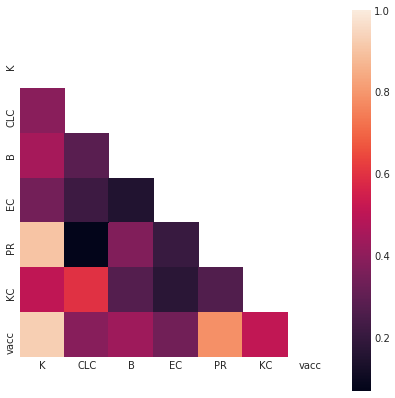

In [7]:
# Compute the correlation matrix
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(7, 7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
plt.show()

Alta correlação entre page rank e degree, e degree e random walk accessbility.

## B

In [8]:
G1 = nx.read_edgelist("hamster.txt", nodetype=int, data=(('weight',float),))
vk, KC, CLC, B, EC, PR, vacc = calcula_medidas(G1)

KeyboardInterrupt: 

In [12]:
df = pd.DataFrame({'K':vk,'CLC':CLC,'B':B,'EC':EC,'PR':PR,'KC':KC, 'vacc':vacc})
df.head()

,K,CLC,B,EC,PR,KC,vacc
0,27,0.342421,0.002991,0.036847,0.000932,17,47.244948
1,45,0.341469,0.004037,0.035748,0.001419,20,39.478923
2,3,0.257508,0.000004,0.001166,0.000190,3,13.425511
3,17,0.295572,0.001782,0.014714,0.000676,9,38.527835
4,12,0.291810,0.001472,0.007331,0.000593,7,24.577997


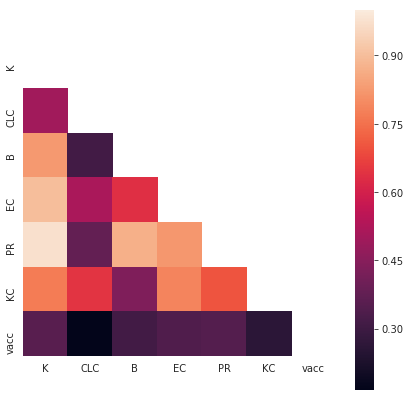

In [15]:
# Compute the correlation matrix
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(7, 7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
plt.show()

## C

In [28]:
G2 = nx.Graph(nx.read_gml("celegansneural.gml"))
vk, KC, CLC, B, EC, PR, vacc = calcula_medidas(G2)

In [33]:
df = pd.DataFrame({'K':vk,'CLC':CLC,'B':B,'EC':EC,'PR':PR,'KC':KC,'vacc':vacc})
df.head()

,K,CLC,B,EC,PR,KC,vacc
0,11,0.402721,0.001213,0.039202,0.002526,10,20.826709
1,29,0.442451,0.015743,0.065059,0.006208,10,29.582098
2,74,0.516579,0.048015,0.228403,0.014699,10,37.979164
3,52,0.500846,0.028536,0.152752,0.010312,10,39.380157
4,54,0.500846,0.031163,0.165358,0.010646,10,40.039105


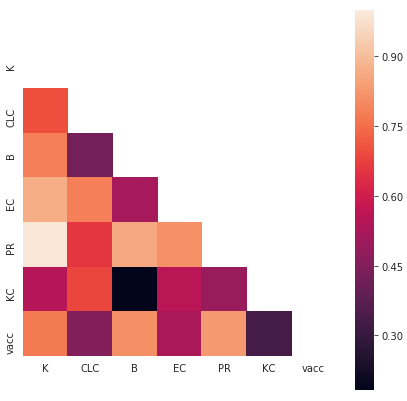

In [34]:
# Compute the correlation matrix
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(7, 7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
plt.show()

## D

In [72]:
G3 = nx.read_edgelist("USairport500.txt", nodetype = int, data = (('weight', float),))
vk, KC, CLC, B, EC, PR, vacc = calcula_medidas(G3)

In [73]:
df = pd.DataFrame({'K':vk,'CLC':CLC,'B':B,'EC':EC,'PR':PR,'KC':KC, 'vacc':vacc})
df.head()

,K,CLC,B,EC,PR,KC,vacc
0,145,0.526927,9.036545e-02,0.190768,0.040518,29,0.0
1,15,0.374063,4.654081e-04,0.036366,0.001068,12,0.0
2,40,0.429802,2.690916e-02,0.069163,0.005892,21,0.0
3,1,0.345329,0.000000e+00,0.003968,0.000350,1,0.0
4,4,0.347251,7.316568e-07,0.008793,0.000494,4,0.0


In [74]:
# Não sei pq tá dando 0. Fiz a mesma coisa pra todos. Deve ser coisa da rede. 

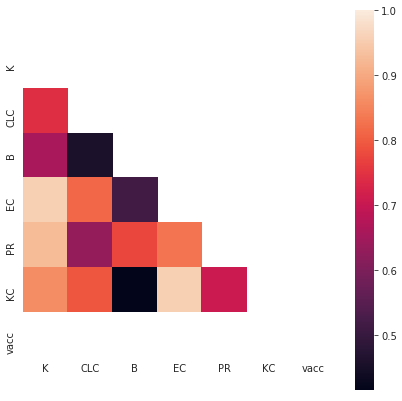

In [75]:
# Compute the correlation matrix
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(7, 7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
plt.show()

## 2	– Choose	four	dataset	of	cities	(from	OSMX	or	any	other	dataset)	and	compare	the	cities	in	terms	o the	centrality	measures.	That	is,	construct	the	histogram	of (i)	degree,	(ii)	closeness	centrality	and	(iii) betweenness	centrality.	Discuss	which	city	is	easier	to	navigate	in	terms	of	these	distributions.

In [156]:
## Olha pra rodar num tempo aceitável eu dei uma aleatoriezada e peguei só um componente de cada rede. 
##Não peguei o último mas tbm não peguei o primeiro pq mesmo com ele tava impossível
## Se quiser aumentar depois podemos rodar com tudo no final, mas ai vai ter que deixar rodando um tempão.

In [147]:
ny = nx.read_edgelist("newyork_edge_list.txt", nodetype=int)
ny=sorted(nx.connected_component_subgraphs(ny), key = len, reverse=True)
ny=ny[2]
sp = nx.read_edgelist("saopaulo_edge_list.txt", nodetype=int)
sp=sorted(nx.connected_component_subgraphs(sp), key = len, reverse=True)
sp=sp[1]
to = nx.read_edgelist("tokyo_edge_list.txt", nodetype=int) 
to=sorted(nx.connected_component_subgraphs(to), key = len, reverse=True)
to=to[1]
fl = nx.read_edgelist("florida1.txt", nodetype=int, data=(('weight',float),)) 
min_weight = 1.0
flo = nx.Graph()
for (u,v,w) in fl.edges(data=True):
    if w['weight'] > min_weight :
        flo.add_edge(u, v, weight=1)
labels = flo.nodes()

Não vamos conseguir colocar tudo no mesmo histograma acho. Pois eles possuem os mesmo valores no eixo x 1,2,3... Então vai dar muita intersecção. Acho que ele quer um pra cada e comparar.


### I) DEGREE

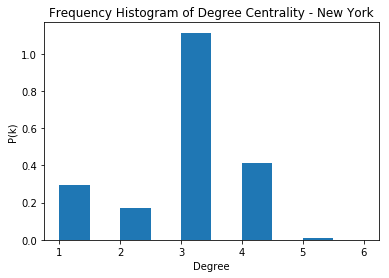

In [148]:
# New York
vk1 = dict(ny.degree())
vk1 = list(vk1.values())

plt.hist(vk1,density=True)

plt.gca().set(title='Frequency Histogram of Degree Centrality - New York', ylabel='P(k)', xlabel = 'Degree')
plt.show(True)


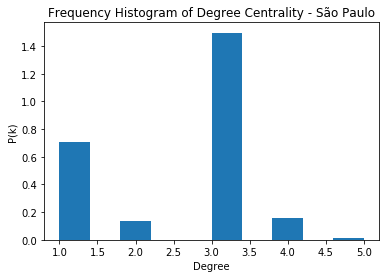

In [149]:
#São Paulo
vk2 = dict(sp.degree())
vk2 = list(vk2.values())

plt.hist(vk2,density=True)

plt.gca().set(title='Frequency Histogram of Degree Centrality - São Paulo', ylabel='P(k)', xlabel = 'Degree')
plt.show(True)


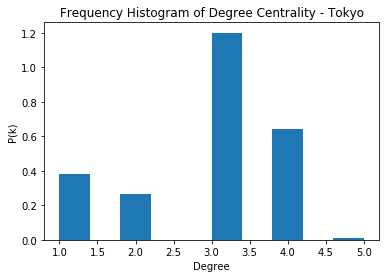

In [150]:
# Tokyo
vk3 = dict(to.degree())
vk3 = list(vk3.values())

plt.hist(vk3,density=True)

plt.gca().set(title='Frequency Histogram of Degree Centrality - Tokyo', ylabel='P(k)', xlabel = 'Degree')
plt.show(True)


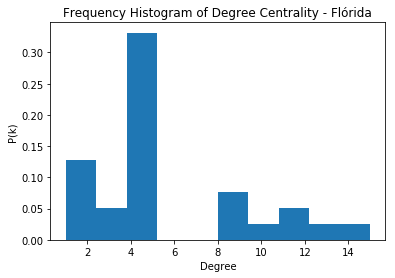

In [151]:
# Florida
vk4 = dict(flo.degree())
vk4 = list(vk4.values())

plt.hist(vk4,density=True)

plt.gca().set(title='Frequency Histogram of Degree Centrality - Flórida', ylabel='P(k)', xlabel = 'Degree')
plt.show(True)


### II) CLOSENESS CENTRALITY  

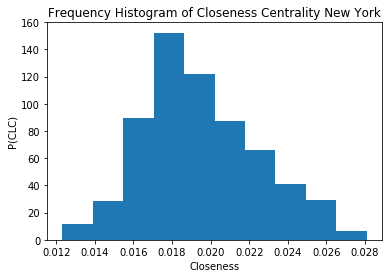

In [152]:
#II) CLOSENESS CENTRALITY                      
CLC1 = dict(nx.closeness_centrality(ny))
CLC1 = list(CLC1.values())
plt.hist(CLC1, density=True)
plt.gca().set(title='Frequency Histogram of Closeness Centrality New York', ylabel='P(CLC)', xlabel = 'Closeness')
plt.show(True)

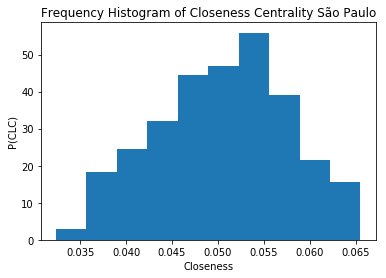

In [153]:
# São Paulo
CLC2 = dict(nx.closeness_centrality(sp))
CLC2 = list(CLC2.values())
plt.hist(CLC2,  density=True)
plt.gca().set(title='Frequency Histogram of Closeness Centrality São Paulo', ylabel='P(CLC)', xlabel = 'Closeness')
plt.show(True)

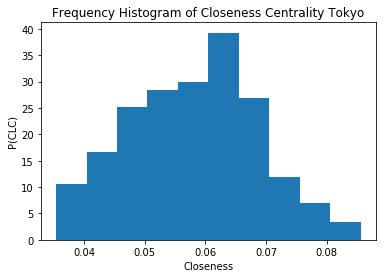

In [154]:
# tokyo
CLC3 = dict(nx.closeness_centrality(to))
CLC3 = list(CLC3.values())
plt.hist(CLC3,  density=True)
plt.gca().set(title='Frequency Histogram of Closeness Centrality Tokyo', ylabel='P(CLC)', xlabel = 'Closeness')
plt.show(True)

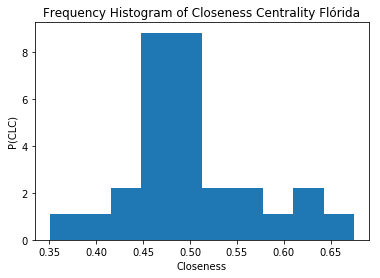

In [155]:
# Flórida
CLC4 = dict(nx.closeness_centrality(flo))
CLC4 = list(CLC4.values())
plt.hist(CLC4,  density=True)
plt.gca().set(title='Frequency Histogram of Closeness Centrality Flórida', ylabel='P(CLC)', xlabel = 'Closeness')
plt.show(True)

### III) BETWEENNESS CENTRALITY

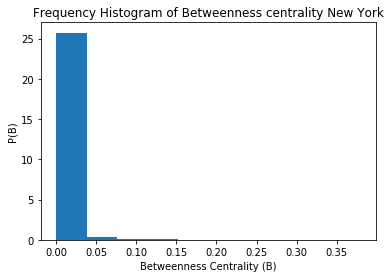

In [157]:
# New York
B1 = dict(nx.betweenness_centrality(ny))
B1 = list(B1.values())
plt.hist(B1, density=True)
plt.gca().set(title='Frequency Histogram of Betweenness centrality New York', ylabel='P(B)', xlabel = 'Betweenness Centrality (B)')
plt.show(True)

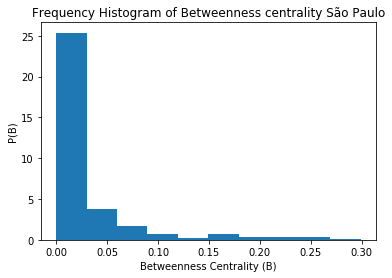

In [158]:
# São paulo
B2 = dict(nx.betweenness_centrality(sp))
B2 = list(B2.values())
plt.hist(B2, density=True)
plt.gca().set(title='Frequency Histogram of Betweenness centrality São Paulo', ylabel='P(B)', xlabel = 'Betweenness Centrality (B)')
plt.show(True)

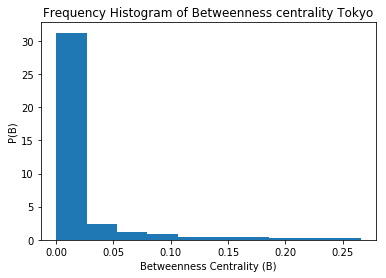

In [159]:
# Tokyo
B3 = dict(nx.betweenness_centrality(to))
B3 = list(B3.values())
plt.hist(B3, density=True)
plt.gca().set(title='Frequency Histogram of Betweenness centrality Tokyo', ylabel='P(B)', xlabel = 'Betweenness Centrality (B)')
plt.show(True)

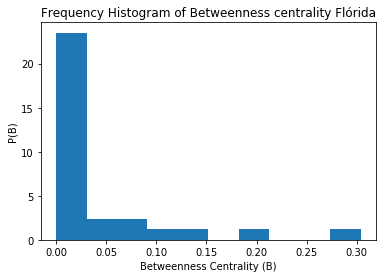

In [160]:
# Flórida
B4 = dict(nx.betweenness_centrality(flo))
B4 = list(B4.values())
plt.hist(B4, density=True)
plt.gca().set(title='Frequency Histogram of Betweenness centrality Flórida', ylabel='P(B)', xlabel = 'Betweenness Centrality (B)')
plt.show(True)

# Exercício 3

In [3]:
def measures(G):
    #I) Degree
    vk = dict(G.degree())
    vk = list(vk.values())
    
    #III) Closeness centrality
    CLC = dict(nx.closeness_centrality(G))
    CLC = list(CLC.values())

    #V) Eigenvector centrality
    EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
    EC = list(EC.values())

    #VI) Page rank
    PR = dict(nx.pagerank(G, alpha=0.85))
    PR = list(PR.values())

    return vk, CLC, EC, PR


# a)	Human	protein	network
(http://konect.cc/networks/maayan-vidal)

In [42]:
A_1 = nx.read_edgelist("out.maayan-vidal.txt", nodetype=int, data=(('weight',float),)) 
vk1, CLC1, EC1, PR1  = measures(A_1)

### I) Degree

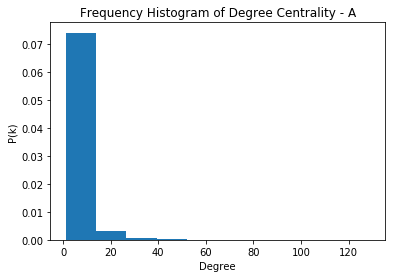

In [44]:
plt.hist(vk1,density=True)
plt.gca().set(title='Frequency Histogram of Degree Centrality - A', ylabel='P(k)', xlabel = 'Degree')
plt.show(True)

### II) Eigenvector centrality

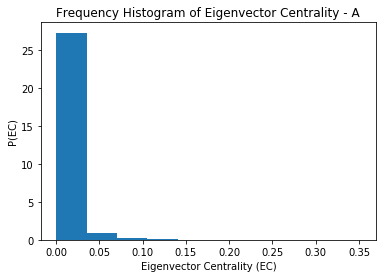

In [46]:
# #Eigenvector centrality
plt.hist(EC1, density=True)
plt.gca().set(title='Frequency Histogram of Eigenvector Centrality - A', ylabel='P(EC)', xlabel = 'Eigenvector Centrality (EC)')
plt.show(True)

### III) PageRank

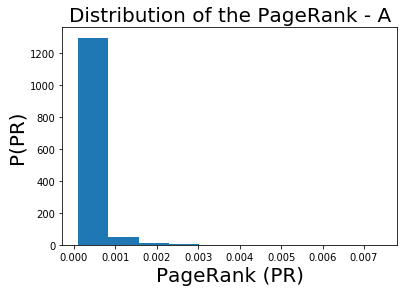

In [47]:
plt.figure(figsize=(6,4))
plt.hist(PR1, density=True)
plt.title("Distribution of the PageRank - A", fontsize = 20)
plt.ylabel("P(PR)", fontsize = 20)
plt.xlabel("PageRank (PR)",fontsize = 20)

plt.show(True)


### IV) Closeness

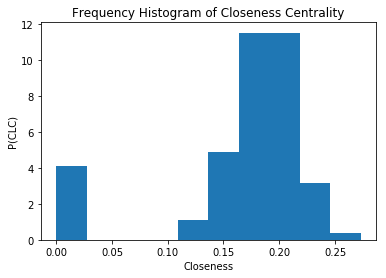

In [49]:
plt.hist(CLC1,  density=True)
plt.gca().set(title='Frequency Histogram of Closeness Centrality', ylabel='P(CLC)', xlabel = 'Closeness')
plt.show(True)

## b) C-elegans 2007

In [6]:
B_1 = nx.read_edgelist("C-elegans-protein-2007.txt") 
vk2, CLC2, EC2, PR2  = measures(B_1)

### I) Degree

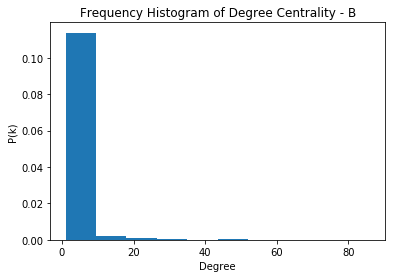

In [9]:
plt.hist(vk2,density=True)
plt.gca().set(title='Frequency Histogram of Degree Centrality - B', ylabel='P(k)', xlabel = 'Degree')
plt.show(True)

### II) Eigenvector centrality

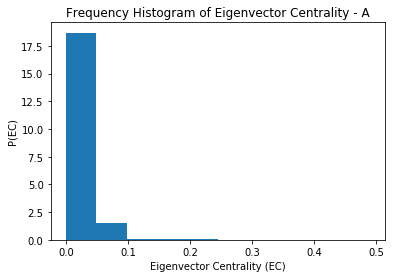

In [10]:
# #Eigenvector centrality
plt.hist(EC2, density=True)
plt.gca().set(title='Frequency Histogram of Eigenvector Centrality - A', ylabel='P(EC)', xlabel = 'Eigenvector Centrality (EC)')
plt.show(True)

### III) Page Rank

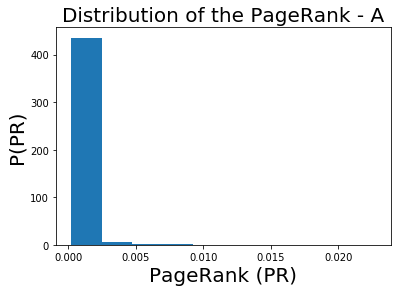

In [11]:
plt.figure(figsize=(6,4))
plt.hist(PR2, density=True)
plt.title("Distribution of the PageRank - A", fontsize = 20)
plt.ylabel("P(PR)", fontsize = 20)
plt.xlabel("PageRank (PR)",fontsize = 20)

plt.show(True)

### IV) Closeness

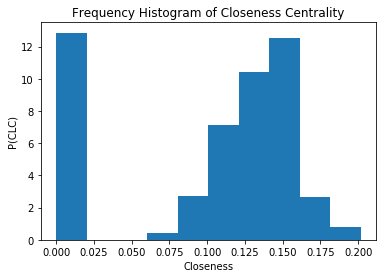

In [14]:
plt.hist(CLC2,  density=True)
plt.gca().set(title='Frequency Histogram of Closeness Centrality', ylabel='P(CLC)', xlabel = 'Closeness')
plt.show(True)

## C) C-elegans 2004

In [4]:
C_1 = nx.read_edgelist("C-elegans-protein-2004.txt") 
vk3, CLC3, EC3, PR3  = measures(C_1)

### I) Degree

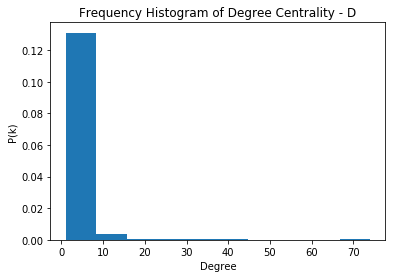

In [11]:
plt.hist(vk3,density=True)
plt.gca().set(title='Frequency Histogram of Degree Centrality - D', ylabel='P(k)', xlabel = 'Degree')
plt.show(True)

### II) Eigenvector centrality

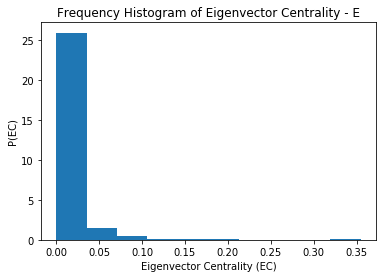

In [12]:
# #Eigenvector centrality
plt.hist(EC3, density=True)
plt.gca().set(title='Frequency Histogram of Eigenvector Centrality - E', ylabel='P(EC)', xlabel = 'Eigenvector Centrality (EC)')
plt.show(True)

### III) PageRank

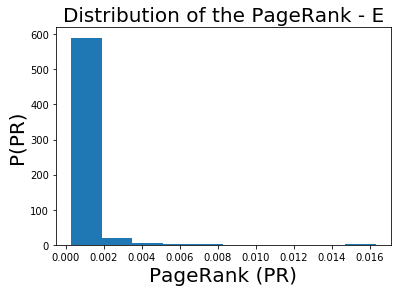

In [13]:
plt.figure(figsize=(6,4))
plt.hist(PR3, density=True)
plt.title("Distribution of the PageRank - E", fontsize = 20)
plt.ylabel("P(PR)", fontsize = 20)
plt.xlabel("PageRank (PR)",fontsize = 20)

plt.show(True)


### IV) Closeness

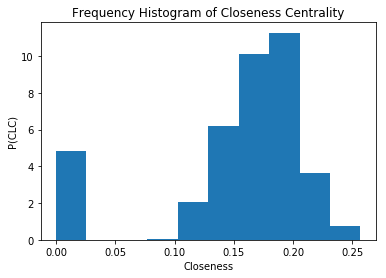

In [14]:
plt.hist(CLC3,  density=True)
plt.gca().set(title='Frequency Histogram of Closeness Centrality', ylabel='P(CLC)', xlabel = 'Closeness')
plt.show(True)

# d)	Western	US	power	grid
(http://wwwpersonal.umich.edu/~mejn/netdata/power.zip)

In [15]:
D_1 = nx.read_gml("power.gml", label='id')
vk4, CLC4, EC4, PR4  = measures(D_1)

### I) Degree

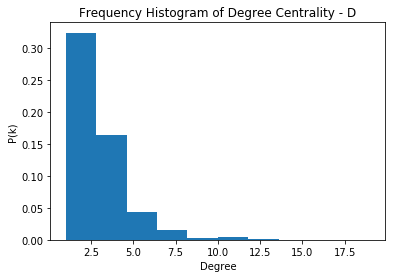

In [16]:
plt.hist(vk4,density=True)
plt.gca().set(title='Frequency Histogram of Degree Centrality - D', ylabel='P(k)', xlabel = 'Degree')
plt.show(True)

### II) Eigenvector centrality

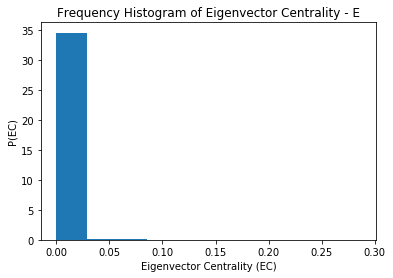

In [17]:
# #Eigenvector centrality
plt.hist(EC4, density=True)
plt.gca().set(title='Frequency Histogram of Eigenvector Centrality - E', ylabel='P(EC)', xlabel = 'Eigenvector Centrality (EC)')
plt.show(True)

### III) PageRank

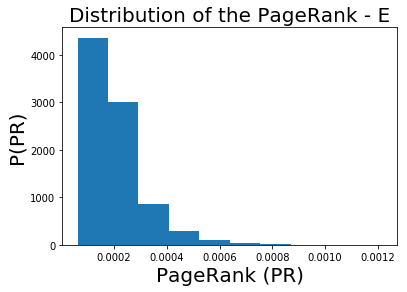

In [18]:
plt.figure(figsize=(6,4))
plt.hist(PR4, density=True)
plt.title("Distribution of the PageRank - E", fontsize = 20)
plt.ylabel("P(PR)", fontsize = 20)
plt.xlabel("PageRank (PR)",fontsize = 20)

plt.show(True)


### IV) Closeness

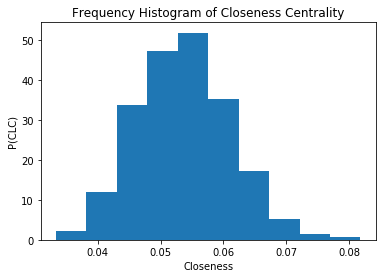

In [19]:
plt.hist(CLC4,  density=True)
plt.gca().set(title='Frequency Histogram of Closeness Centrality', ylabel='P(CLC)', xlabel = 'Closeness')
plt.show(True)

## e) Dependencies

In [20]:
E_1 = nx.read_edgelist("dependencies.txt") 
vk5, CLC5, EC5, PR5  = measures(E_1)

### I) Degree

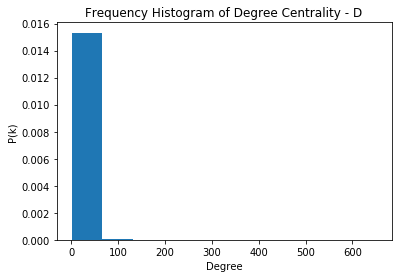

In [21]:
plt.hist(vk5,density=True)
plt.gca().set(title='Frequency Histogram of Degree Centrality - D', ylabel='P(k)', xlabel = 'Degree')
plt.show(True)

### II) Eigenvector centrality

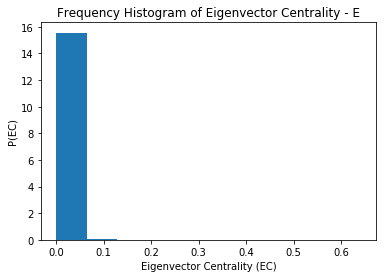

In [22]:
# #Eigenvector centrality
plt.hist(EC5, density=True)
plt.gca().set(title='Frequency Histogram of Eigenvector Centrality - E', ylabel='P(EC)', xlabel = 'Eigenvector Centrality (EC)')
plt.show(True)

### III) PageRank

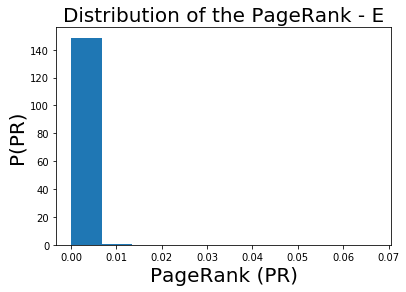

In [23]:
plt.figure(figsize=(6,4))
plt.hist(PR5, density=True)
plt.title("Distribution of the PageRank - E", fontsize = 20)
plt.ylabel("P(PR)", fontsize = 20)
plt.xlabel("PageRank (PR)",fontsize = 20)

plt.show(True)


### IV) Closeness

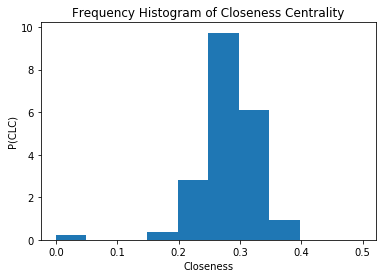

In [24]:
plt.hist(CLC5,  density=True)
plt.gca().set(title='Frequency Histogram of Closeness Centrality', ylabel='P(CLC)', xlabel = 'Closeness')
plt.show(True)

# EXERCICIO 4 

In [37]:
# Western us power grid
#Base item D
us = nx.read_gml("power.gml", label='id')
vk1 = dict(us.degree())
vk1 = list(vk1.values())
# I) DEGREE
# average 
av_degree1 = np.mean(vk1)
#standard deviation
sd_degree1 = np.std(vk1)

#second moment
mom_degree1 = moment(vk1, moment=2)

#Shannon entropy
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk
ks, Pk = degree_distribution(us)

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H_degree1 = shannon_entropy(us)

#II) K-core
# KC= dict(nx.core_number(us))    #NetworkXNotImplemented: not implemented for multigraph type
# KC = list(KC.values())

#III) Closeness centrality 
# average 
av_close3 = np.mean(CLC)
#standard deviation
sd_close3 = np.std(CLC)

#second moment
mom_close3 = moment(CLC, moment=2)

#Shannon entropy
# H_close1 = shannon_entropy(CLC)

NetworkXNotImplemented: not implemented for multigraph type

In [44]:
# Betweenness centrality
# B = dict(nx.betweenness_centrality(us))
# print('Betweeness centrality:', B)
# # average 
# av_close4 = np.mean(B)
# #standard deviation
# sd_close4 = np.std(B)

# #second moment
# from scipy.stats import moment
# mom_close4 = moment(B, moment=2)

#Shannon entropy
# H_close1 = shannon_entropy(CLC)

#Eigenvector centrality 
# EC = dict(nx.eigenvector_centrality(us, max_iter = 1000))
# print('Eigenvetor centrality:', EC)

# # average 
# av_close4 = np.mean(EC)
# #standard deviation
# sd_close4 = np.std(EC)

# #second moment
# from scipy.stats import moment
# mom_close4 = moment(EC, moment=2)

#Shannon entropy
# H_close1 = shannon_entropy(EC)

# Page-rank
# PR = dict(nx.pagerank(us, alpha=0.85))
# print("PageRank: ", PR)
# # average 
# av_close4 = np.mean(PR)
# #standard deviation
# sd_close4 = np.std(PR)

# #second moment
# from scipy.stats import moment
# mom_close4 = moment(PR, moment=2)

#Shannon entropy
# H_close1 = shannon_entropy(PR)

# Exercício 5

# a)	E-road	network	
(http://konect.cc/networks/subelj_euroroad),

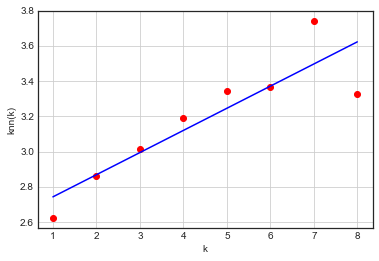

In [61]:
A = nx.read_edgelist("euroroad.txt", nodetype=int, data=(('weight',float),)) 
knn = []
for i in A.nodes():
    aux =  nx.average_neighbor_degree(A, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)

vk = dict(A.degree())
vk = list(vk.values())

knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
plt.plot(ks, knnk, 'ro')
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
#plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)")
plt.xlabel("k")
plt.grid(True)
plt.savefig('knnk.eps')

# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '-b')
plt.savefig('knn.eps') #save the figure into a file
plt.show(True)

In [62]:
#Pearson correlation coef 
rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

#Assortatinity coef 
r=nx.degree_assortativity_coefficient(A)
print("Assortativity = ","%3.4f"%r)

Pearson correlation coefficient: 0.8871708484821041
Assortativity =  0.1267


# b)	C.	elegans	neural	network	
(http://www-personal.umich.edu/~mejn/netdata/celegansneural.zip)

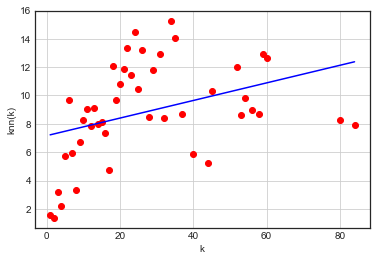

In [63]:
B = nx.read_gml("celegansneural.gml") 
knn = []
for i in B.nodes():
    aux =  nx.average_neighbor_degree(B, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)

vk = dict(B.degree())
vk = list(vk.values())

knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
plt.plot(ks, knnk, 'ro')
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
#plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)")
plt.xlabel("k")
plt.grid(True)
plt.savefig('knnk.eps')

# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '-b')
plt.savefig('knn.eps') #save the figure into a file
plt.show(True)

In [64]:
#Pearson correlation coef 
rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

#Assortatinity coef 
r=nx.degree_assortativity_coefficient(B)
print("Assortativity = ","%3.4f"%r)

Pearson correlation coefficient: 0.3744723931682752
Assortativity =  -0.2258


# c)	US	airport	network	
(http://toreopsahl.com/datasets/#usairports)

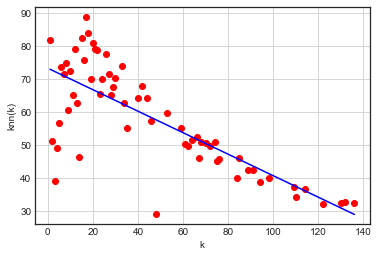

In [65]:
C = nx.read_edgelist("USairport500.txt", nodetype = int, data = (('weight', float),))
knn = []
for i in C.nodes():
    aux =  nx.average_neighbor_degree(C, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)

vk = dict(C.degree())
vk = list(vk.values())

knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
plt.plot(ks, knnk, 'ro')
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
#plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)")
plt.xlabel("k")
plt.grid(True)
plt.savefig('knnk.eps')

# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '-b')
plt.savefig('knn.eps') #save the figure into a file
plt.show(True)

In [66]:
#Pearson correlation coef 
rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

#Assortatinity coef 
r=nx.degree_assortativity_coefficient(C)
print("Assortativity = ","%3.4f"%r)

Pearson correlation coefficient: -0.7756491513624391
Assortativity =  -0.2679


# d)	Human	protein	network	
(http://konect.cc/networks/maayan-vidal)

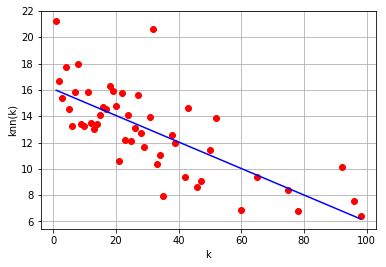

In [2]:
D = nx.read_edgelist("out.maayan-vidal.txt", nodetype = int, data = (('weight', float),))
knn = []
for i in D.nodes():
    aux =  nx.average_neighbor_degree(D, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)

vk = dict(D.degree())
vk = list(vk.values())

knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
plt.plot(ks, knnk, 'ro')
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
#plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)")
plt.xlabel("k")
plt.grid(True)
plt.savefig('knnk.eps')

# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '-b')
plt.savefig('knn.eps') #save the figure into a file
plt.show(True)

In [4]:
#Pearson correlation coef 
rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

#Assortatinity coef 
r=nx.degree_assortativity_coefficient(D)
print("Assortativity = ","%3.4f"%r)

Pearson correlation coefficient: -0.7411175320803627
Assortativity =  -0.1140


# EXERCÍCIO 6 

In [4]:
from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import mutual_info_score
from community import community_louvain
from networkx.algorithms import community

In [6]:
def ordenar(node_list):
    data = pd.DataFrame(columns = ['node','community'])
    for counti, i in enumerate(node_list):
        for countj, j in enumerate(i):
            data = data.append(pd.DataFrame([[j,counti]], columns = ['node','community']))
    # Retornando uma lista
    return data.sort_values(by = 'node').community.tolist()

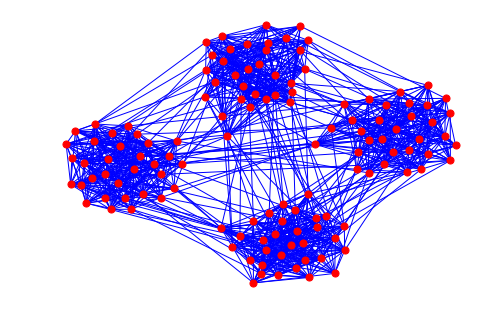

In [7]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.04
k =16
minc = 32
maxc = 32

G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)

## Verdadeiras comunidades
true_communities = list({frozenset(G.nodes[v]['community']) for v in G})
true = ordenar(true_communities)

pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, nodecolor='r', edge_color='b', 
        node_size=50, font_size=16,  width=1,pos = pos)
plt.show(True)
str_net = 'Downloads/Redes_complexas/graph6'

In [94]:
def ordenar(node_list):
    data = pd.DataFrame(columns = ['node','community'])
    for counti, i in enumerate(node_list):
        for countj, j in enumerate(i):
            data = data.append(pd.DataFrame([[j,counti]], columns = ['node','community']))
    # Retornando uma lista
    return data.sort_values(by = 'node').community.tolist()

# Fastgreedy

In [12]:
import community
from networkx.algorithms.community.quality import modularity_max
from networkx.algorithms.community import greedy_modularity_communities
fast = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in fast:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.show(True)

ImportError: cannot import name 'modularity_max'

In [116]:
fast_2 = ordenar(fast)
nmi_fast= (mutual_info_score(true, fast_2))
nmi_fast

1.3862943611198904

# Label	propagation

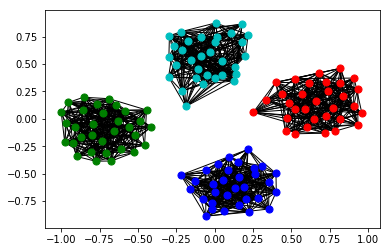

In [13]:
lp = nx.algorithms.community.label_propagation.label_propagation_communities(G)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in lp:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.show(True)

In [15]:
lp_2 = ordenar(lp)
nmi_lp= (mutual_info_score(true, lp_2))
nmi_lp

TypeError: mutual_info_score() missing 1 required positional argument: 'labels_pred'

In [16]:
lp_2


[]

# Girvan-Newman method (betweenness centrality)

In [106]:
communities = community.girvan_newman(G)
k = 4
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)

community: [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
community: [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
community: [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
community: [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]


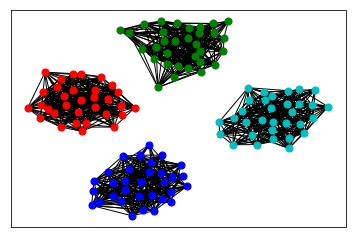

In [107]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in c:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.show(True)

In [115]:
communities_2 = ordenar(c)
nmi_c= (mutual_info_score(true, communities_2))
nmi_c

1.3862943611198904

# Louvain 

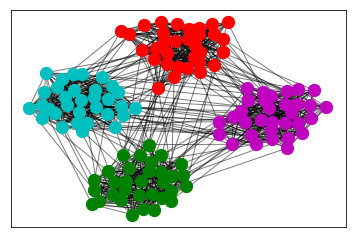

In [112]:
G = G.to_undirected()
partition = community_louvain.best_partition(G)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
louvain = []
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    louvain.append(list_nodes)
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [114]:
louvain_2 = ordenar(louvain)
nmi_l= (mutual_info_score(true, louvain_2))
nmi_l

1.3862943611198904

In [1]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(louvain_2)

NameError: name 'louvain_2' is not defined

# Exercício 7 

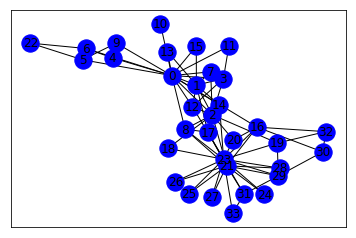

In [88]:
G= G=nx.read_edgelist("zachary.txt", nodetype=int)
#G=nx.karate_club_graph()
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0)
pos=nx.nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G, pos=pos, node_color = 'b')
plt.show(True)
N = len(G)
M = G.number_of_edges()

# Netcarto

# Informap

# Fastgreedy

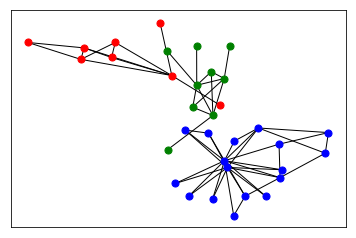

In [89]:
fast = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in fast:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.show(True)

# Label propagation

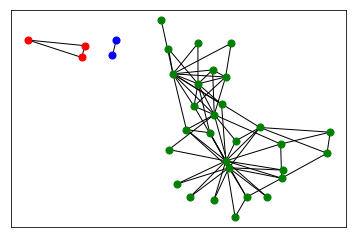

In [90]:
lp = nx.algorithms.community.label_propagation.label_propagation_communities(G)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in lp:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.show(True)

# Girvan-Newman

In [34]:
communities = community.centrality.girvan_newman(G)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)

community: [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 22]
community: [2, 8, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


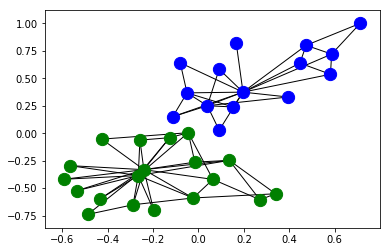

In [35]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in c:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = False, node_size=150)
    aux = aux + 1
plt.show(True)

# Louvain

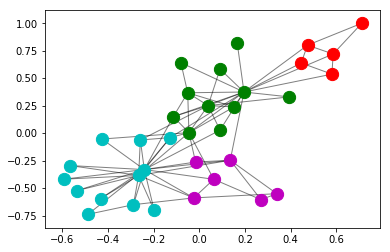

In [37]:
from community import community_louvain
partition = community_louvain.best_partition(G)
#drawing
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# Exercício 8

In [13]:
from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import mutual_info_score
from community import community_louvain
from networkx.algorithms import community

In [65]:
nmi_fast = []
nmi_lp=[]
nmi_cgn = []
nmi_lou = []

for mu in np.arange(0.1,0.9,0.01):
    N = 1000
    tau1 = 3
    tau2 = 1.5
    mu = mu
    minc = 40
        
    G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_community=minc, average_degree=5, seed = 10)
    
    fast = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    fast_2 = ordenar(fast)
    lp = nx.algorithms.community.label_propagation.label_propagation_communities(G)
    lp_2 = ordenar(lp)
#    communities = list(community.centrality.girvan_newman(G))
    partition = community_louvain.best_partition(G)
    louvain = []
    for com in set(partition.values()) :
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        louvain.append(list_nodes)
    lovain_2 = ordenar(louvain)
    
    true_communities = list({frozenset(G.nodes[v]['community']) for v in G})
    true = ordenar(true_communities)
    
    nmi_fast.append(mutual_info_score(true, fast_2))
    nmi_lp.append(mutual_info_score(true, lp_2))
#   nmi_cgn.append(mutual_info_score(true_communities, communities))
    nmi_lou.append(mutual_info_score(true, lovain_2))
    


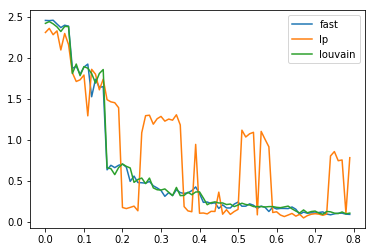

In [70]:
plt.plot(np.arange(0,0.8,0.01), nmi_fast, label = "fast")
plt.plot(np.arange(0,0.8,0.01), nmi_lp, label = "lp")
plt.plot(np.arange(0,0.8,0.01), nmi_lou, label = "louvain")
plt.legend()

# Exercício 9

In [14]:
def calcula(G):
    M = G.number_of_edges()
    #Length
    N = len(G)
    #Average degre
    ad = 2*M/N
    #Assortativity
    r = nx.degree_assortativity_coefficient(G)
    #Shortest path length 
    l = nx.average_shortest_path_length(G)
    #Modularidade Fastgreedy
    fast = nx.algorithms.community.modularity_max.greedy_modularity_communities(A)
    mod_fast = nx_comm.modularity(G, fast)
    # Modularidade Label Propagation
    lp = nx.algorithms.community.label_propagation.label_propagation_communities(G)
    mod_lp = nx_comm.modularity(G, lp)
    # Modularidade givan Newman
    gn = community.centrality.girvan_newman(G)
    mod_gn = nx_comm.modularity(G, gn)
    # Modularidade Louvain
    louvain = []
    for com in set(partition.values()) :
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        louvain.append(list_nodes)
    mod_lou = nx_comm.modularity(G, louvain)
    
    
    return ad, r, l, mod_fast, mod_lp, mod_gn, mod_lou



In [15]:
G = nx.read_edgelist("euroroad.txt", nodetype = int, data = (('weight', float),))
A = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
A=A[0]
A1 = nx.convert_node_labels_to_integers(A)

In [16]:
ad_a, r_a, l_a, mod_fast_a, mod_lp_a, mod_gn_a, mod_lou_a  = calcula(A)

AttributeError: module 'networkx.algorithms.community' has no attribute 'modularity_max'

In [12]:
import networkx.algorithms.community as nx_comm
gn = community.centrality.girvan_newman(A)
gn

NameError: name 'community' is not defined

# Exercicio 10 : gere uma rede Small World e verifique se sua assortatividade, average clustering e shortest path length tem alguma relação com q. 

D:\Users\Luna\Downloads\ANA\lib\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


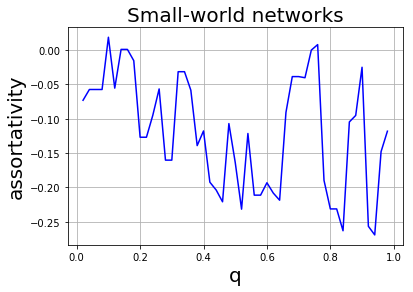

In [27]:
N = 50
av_degree = 8
k = int(av_degree/2)
vcc = []
vq = []
for q in arange(0, 1, 0.02): #q is the rewiring probability
    G = nx.watts_strogatz_graph(N, k, q, seed=1)
    r = nx.degree_assortativity_coefficient(G)
    vcc.append(r)
    vq.append(q)
plt.figure()
plt.plot(vq,vcc,'b')
plt.xlabel("q", fontsize=20)
plt.ylabel("assortativity", fontsize=20)
plt.title("Small-world networks", fontsize=20)
#plt.legend()
plt.grid(True)
#plt.savefig('WS.eps') #save the figure into a file
plt.show();

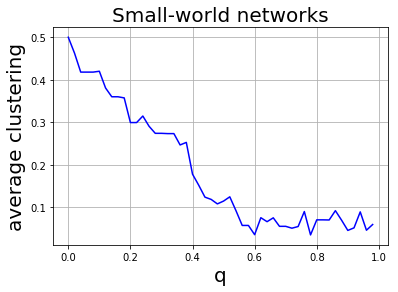

In [28]:
vcc = []
vq = []
for q in arange(0, 1, 0.02): #q is the rewiring probability
    G = nx.watts_strogatz_graph(N, k, q, seed=1)
    cc = nx.average_clustering(G)
    vcc.append(cc)
    vq.append(q)
plt.figure()
plt.plot(vq,vcc,'b')
plt.xlabel("q", fontsize=20)
plt.ylabel("average clustering", fontsize=20)
plt.title("Small-world networks", fontsize=20)
#plt.legend()
plt.grid(True)
#plt.savefig('WS.eps') #save the figure into a file
plt.show();

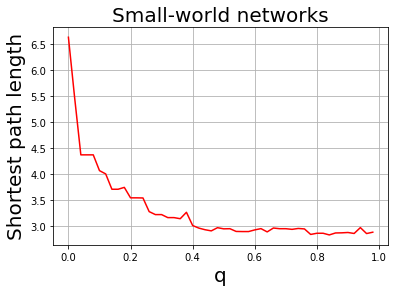

In [29]:
vl = []
vq = []
for q in arange(0, 1, 0.02): #q is the rewiring probability
    G = nx.watts_strogatz_graph(N, k, q, seed=1)
    l = nx.average_shortest_path_length(G)
    vl.append(l)
    vq.append(q)
plt.figure()
plt.plot(vq,vl,'r')
plt.xlabel("q", fontsize=20)
plt.ylabel("Shortest path length", fontsize=20)
plt.title("Small-world networks", fontsize=20)
plt.grid(True)
plt.show();


Conclui-se que a assortatividade não possui relação com a probabilidade de religação da rede, por outro lado, as medidas
'average clustering' e 'shortest path length' tendem a diminuir conforme a probabilidade aumenta.
